# Stocker for Prediction


In [4]:
import pandas as pd
import numpy
import quandl
import datetime
import matplotlib.pyplot as plt
import pystan

In [5]:
import fbprophet
import pytrends

resize ipython notebook output window

In [72]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

### Import the Stocker Class

In [6]:
from stocker import Stocker

### Load Data

In [9]:
apple = Stocker('AAPL')

AAPL Stocker Initialized. Data covers 1980-12-12 to 2018-03-27.


### Basic Plot of Stock History

Maximum Adj. Close = 181.72 on 2018-03-12.
Minimum Adj. Close = 0.16 on 1982-07-08.
Current Adj. Close = 168.34 on 2018-03-27.



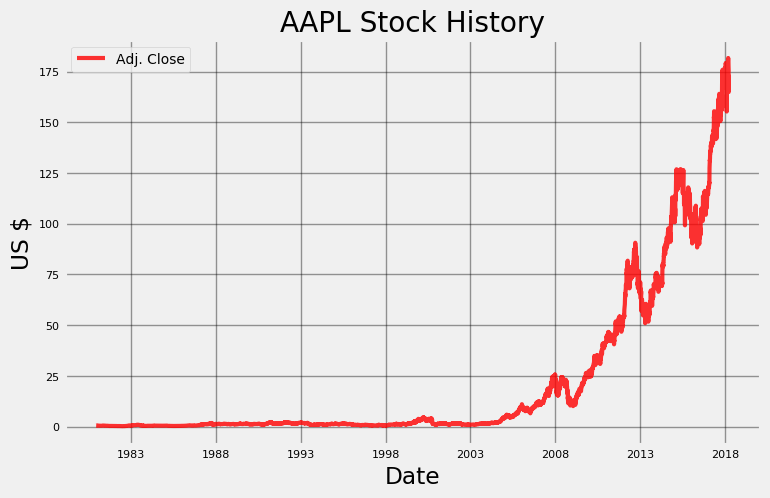

In [10]:
apple.plot_stock()

### Plot of Daily Changes

Maximum Daily Change = 8.20 on 2018-02-06.
Minimum Daily Change = -7.09 on 2015-08-25.
Current Daily Change = -5.34 on 2018-03-27.



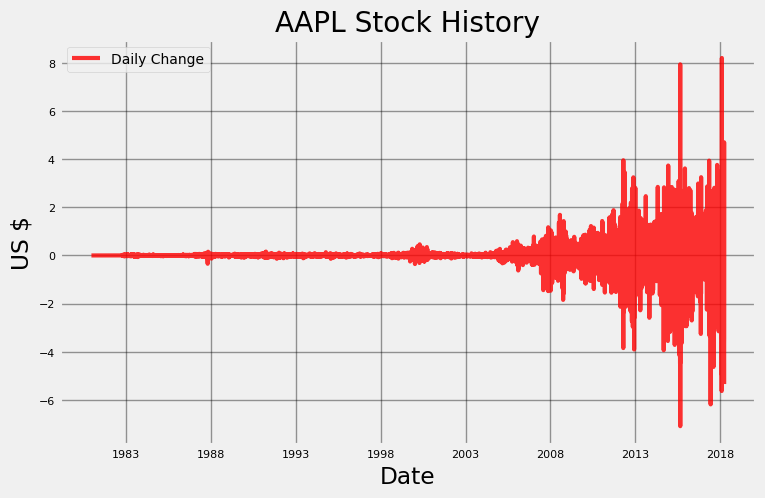

In [11]:
apple.plot_stock(stats=['Daily Change'])

### Examine Trends/Patterns

We can create a basic model (with no predictions) trained on the past 3 years of data to inspect any trends and patterns in the data.

D:\CODE\CODE\NTI - Big Data Science\SP Project\stocker.py:444: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  stock_history = self.stock[self.stock['Date'] > (self.max_date - pd.DateOffset(years = self.training_years)).date()]
D:\CODE\Anaconda\envs\AI\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


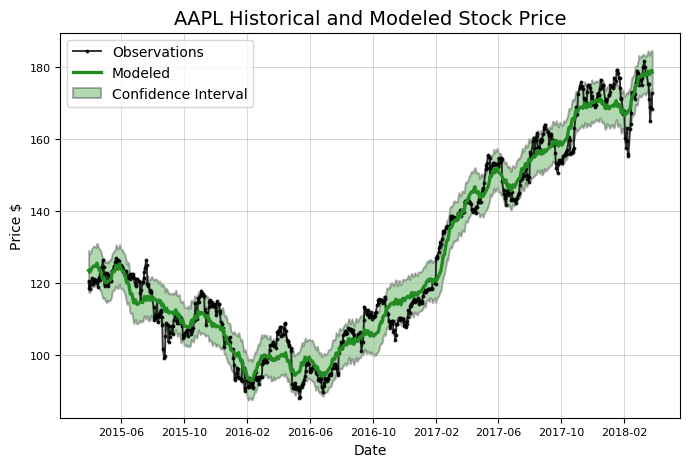

In [12]:
model, model_data = apple.create_prophet_model()

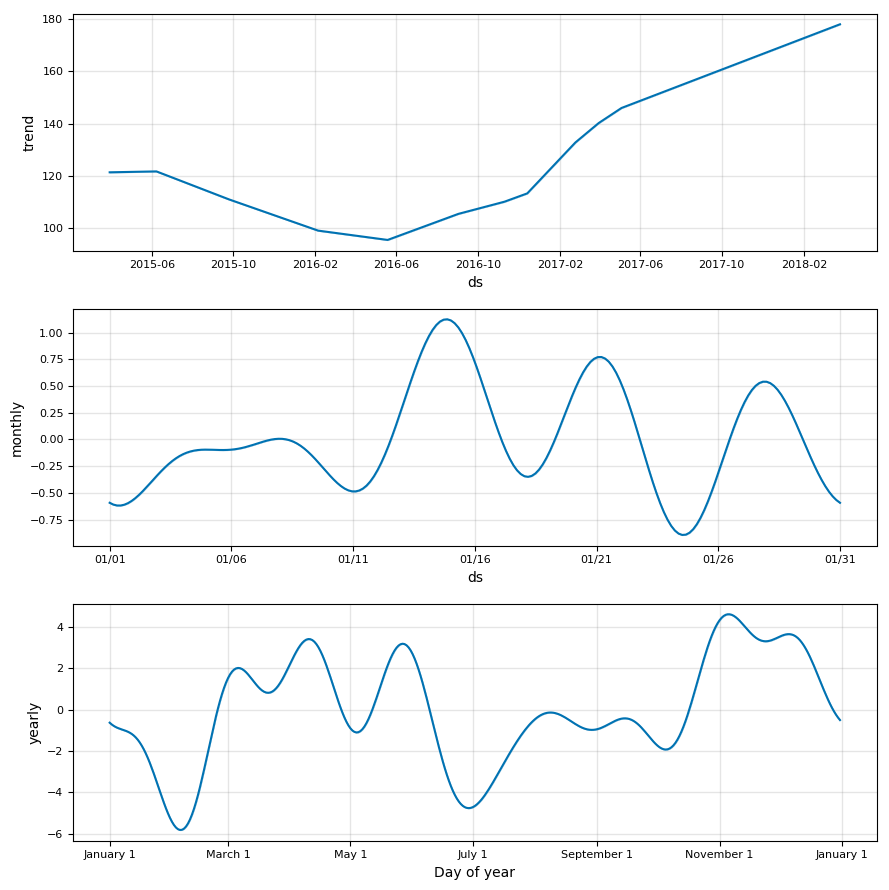

In [13]:
# Variables assigned from previous method call
model.plot_components(model_data)
plt.show()

### Test Addition of a Weekly Seasonality


Although it is unlikely, there might be a significant weekly component which would improve the model. Let's add it in and look at the pattern.

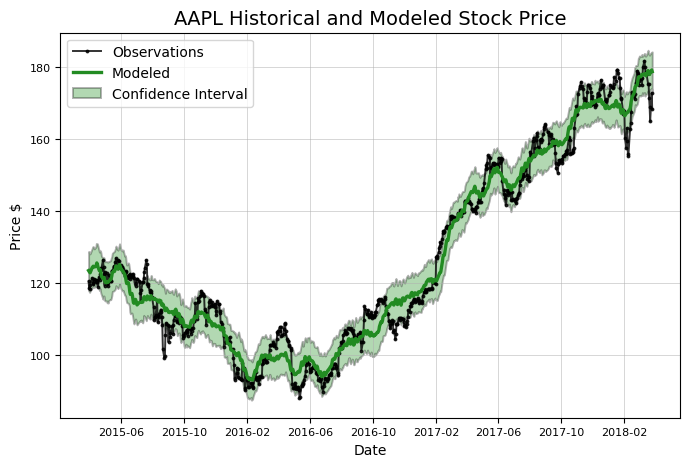

In [15]:
apple.weekly_seasonality=True
model, model_data = apple.create_prophet_model()

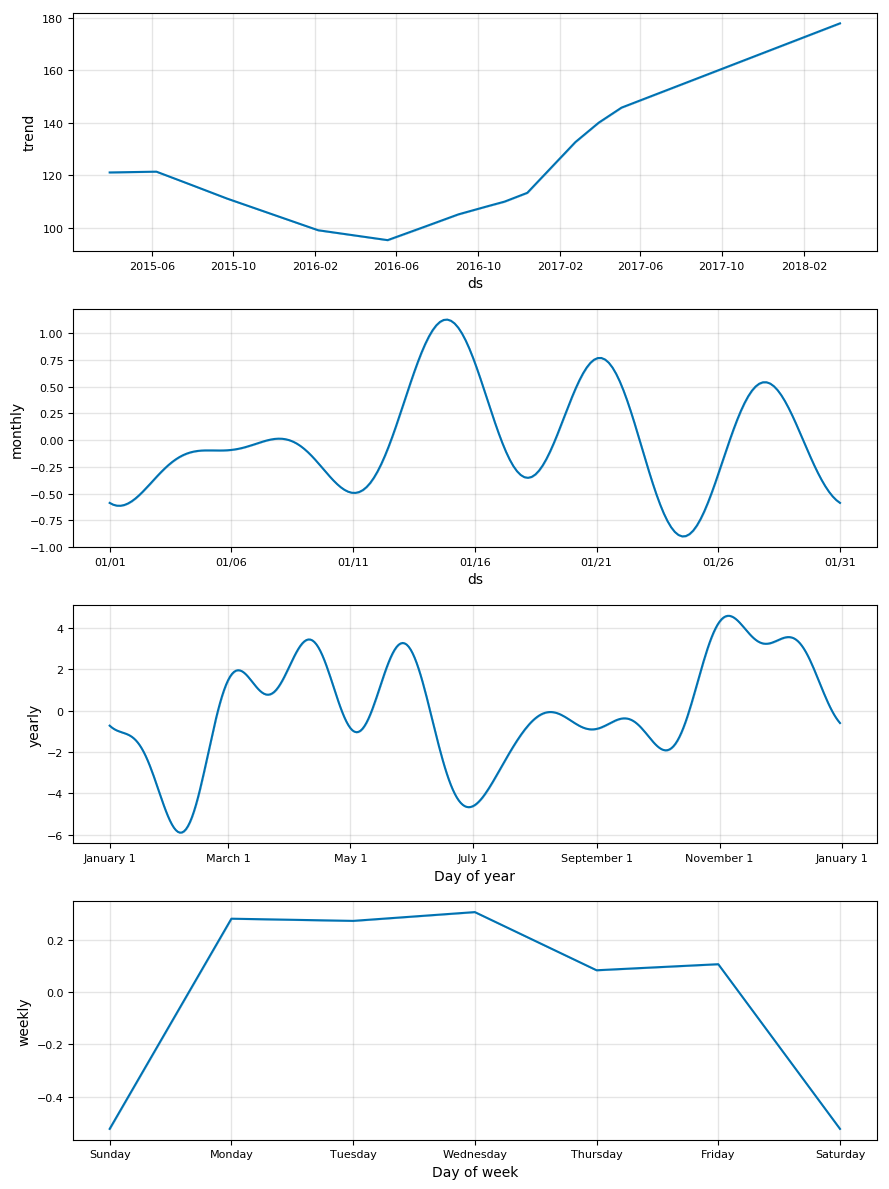

In [16]:
model.plot_components(model_data)
plt.show()

Maybe there is a slight weekly pattern? For now, we can remove that seasonality and then evaluate models with and without it to see the effect on predictions.

In [17]:
apple.weekly_seasonality=False

## First Predictions

We can make a prediction for any number of specified days using the create model method. The prediction also includes the uncertainty interval, a necessity when making estimates about the future!

Predicted Price on 2018-06-25 = $182.64


D:\CODE\CODE\NTI - Big Data Science\SP Project\stocker.py:458: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  future.ix[len(future) - 1, 'ds'].date(), future.ix[len(future) - 1, 'yhat']))


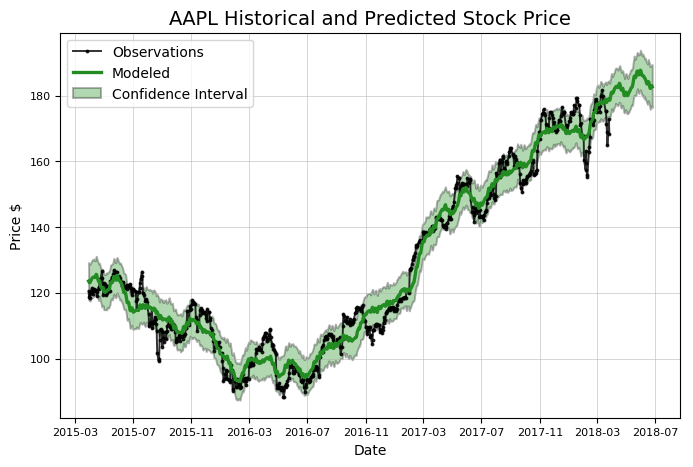

In [18]:
model, model_data = apple.create_prophet_model(days=90)


The model predicts a continuous increase in price. Notice how the model for both the past data and the future data is smoother than the actual observations. The model smooths out the noise on the small scale in order to make more accurate general predictions over a long period. In other words, an additive model will be more accurate at capturing general movements rather than specific daily fluctuations.

## Evaluate Model

Anyone can make stock predictions by simply picking a number. For our predictions to be meaningful, we must evaluate them on real data.

One way to do this is set aside some historical data as a test set and use data from further back as our training set. In the default evaluation method, we test using the past year and train on the 3 years prior to the test period.

To quantify the accuracy of our predictions, we can find the average dollar error on both the testing and training data, the percentage the actual price was in the predicted confidence interval, and the percentage of times we predicted the correct direction for the stock.

D:\CODE\CODE\NTI - Big Data Science\SP Project\stocker.py:498: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  train = self.stock[(self.stock['Date'] < start_date.date()) &
D:\CODE\CODE\NTI - Big Data Science\SP Project\stocker.py:499: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  (self.stock['Date'] > (start_date - pd.DateOffset(years=self.training_years)).date())]
D:\CODE\CODE\NTI - Big Data Science\SP Project\stocker.py:502: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently,


Prediction Range: 2017-03-27 to 2018-03-27.

Predicted price on 2018-03-24 = $207.01.
Actual price on    2018-03-23 = $164.94.

Average Absolute Error on Training Data = $2.83.
Average Absolute Error on Testing  Data = $11.59.

When the model predicted an increase, the price increased 48.59% of the time.
When the model predicted a  decrease, the price decreased  43.66% of the time.

The actual value was within the 80% confidence interval 59.04% of the time.


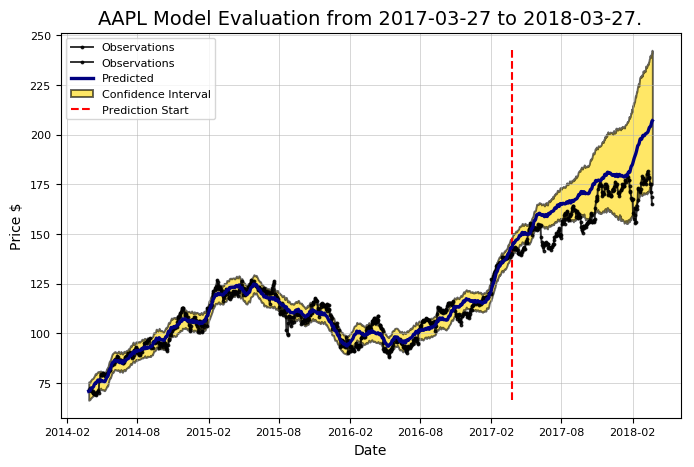

In [19]:
apple.evaluate_prediction()

## Changepoint Prior Scale Selection

Changepoints represent where a time series goes from increasing to decreasing or from increasing slowly to increasingly rapidly. They occur at the places with the greatest change in the rate of the time series.

The changepoint prior scale represents the amount of weight given to the changepoints in the model. This can be used to control overfitting vs underfitting. A higher prior will create a model with more flexibility and more emphasis on the changepoints. This can lead to overfitting because the model will closely follow the training data. Lowering the prior decreases the model flexibility which can cause the opposite problem underfitting. This occurs when our model does not follow the training data closely enough and fails to learn the underlying relationships.

The Stocker class contains two different ways to choose an appropriate prior: grahically and quantitatively with validation data.

## Graphical Comparison

We will start with a range of four priors to compare. First, we can graphically compare them to get an intuition of how the priors affect the model.

D:\CODE\CODE\NTI - Big Data Science\SP Project\stocker.py:385: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  train = self.stock[(self.stock['Date'] > (max(self.stock['Date']) - pd.DateOffset(years=self.training_years)).date())]


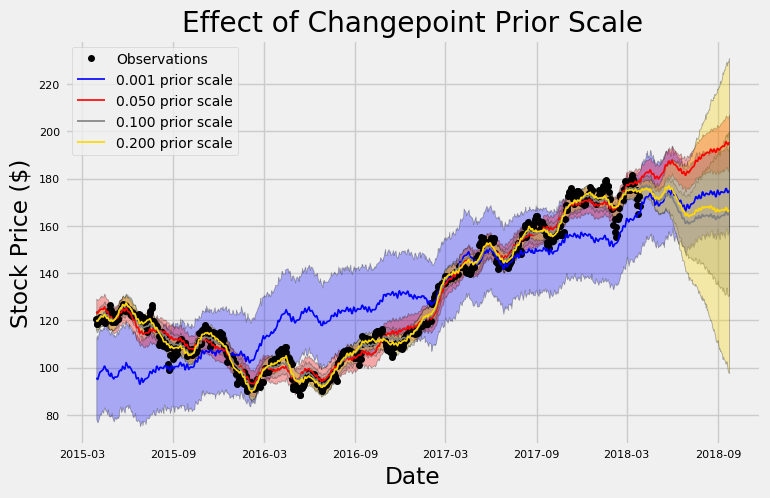

In [21]:
apple.changepoint_prior_analysis(changepoint_priors=[0.001, 0.05, 0.1, 0.2])

# Quantitative Comparison

This gives us an idea of how well each prior fits the training data, but no numbers to back up our intuitions. The changepoint prior validation method is designed to provide numerical backing. We are testing from 2017-01-18 to 2018-01-18, so we need to make sure to use a different validation range. We will select two years prior to the testing date range. The model will be trained on the three years prior to the validation period.


Validation Range 2016-01-04 to 2017-01-03.

     cps  train_err  train_range   test_err  test_range
0  0.001   6.548943    16.608199  37.255852   16.541007
1  0.050   2.034026     6.800417  16.775828   27.188930
2  0.100   1.822806     6.096868  16.976901   44.912134
3  0.200   1.554083     5.247206  19.543375   96.754593


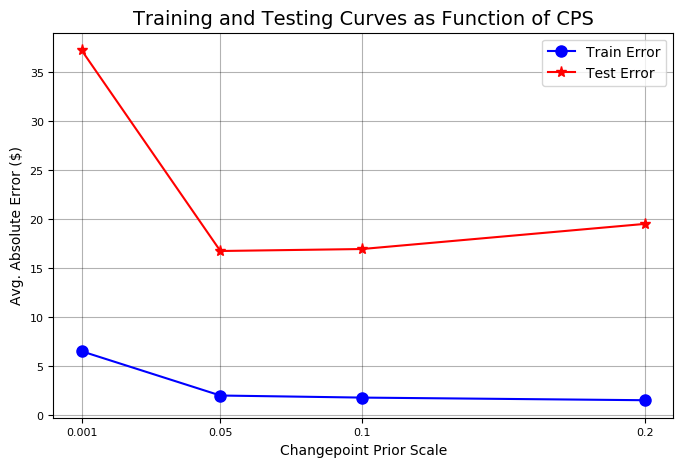

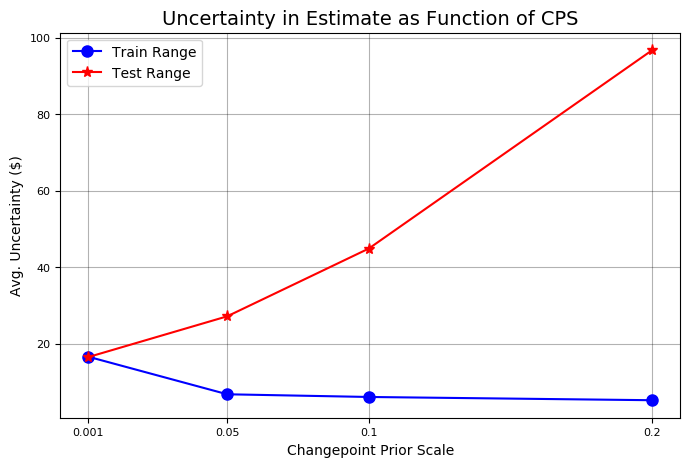

In [64]:
apple.changepoint_prior_validation(start_date='2016-01-04', end_date='2017-01-03', changepoint_priors=[0.001, 0.05, 0.1, 0.2])

The test error decreases as we increase the prior. Stocks change considerably on a day to day basis, and a more flexible model can account for these fluctuations.

## Refine Search


We can evaluate additional changepoint prior scales to determine the best fit for our data


Validation Range 2016-01-04 to 2017-01-03.

    cps  train_err  train_range   test_err  test_range
0  0.15   1.641302     5.520864  20.285556   72.888184
1  0.20   1.554179     5.263344  19.125978   95.249503
2  0.25   1.523015     5.163770  18.084637  109.877582
3  0.40   1.484242     5.039629  20.630897  136.076101
4  0.50   1.472278     5.003391  22.643661  135.732957
5  0.60   1.464367     4.972314  23.104119  151.754272


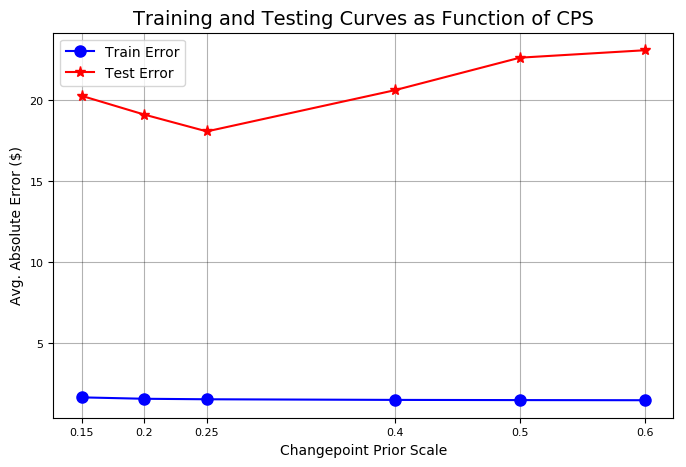

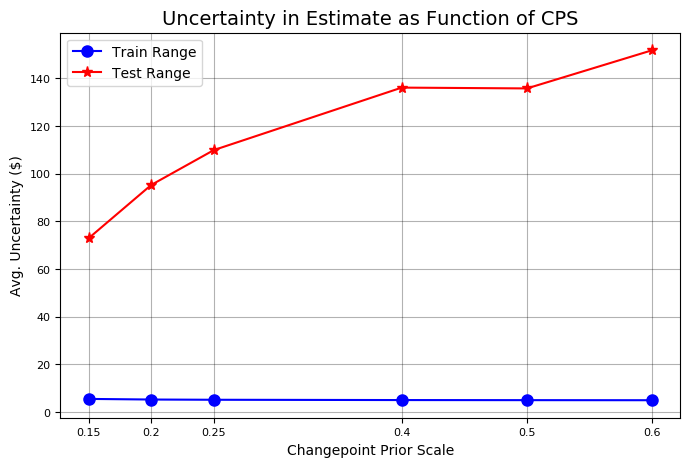

In [24]:
apple.changepoint_prior_validation(start_date='2016-01-04', end_date='2017-01-03', 
                                   changepoint_priors=[0.15, 0.2, 0.25,0.4, 0.5, 0.6])

We now assign the changepoint prior with the smallest error on the testing set to the Stocker object. The prior is one of the attiributes and we can change it like any other variable. At this point, we could also change the seasonalities or the amount of training data to achieve the best performance on the testing data

In [25]:
apple.changepoint_prior_scale = 0.2

## Evaluate Improved Model



Prediction Range: 2017-03-27 to 2018-03-27.

Predicted price on 2018-03-24 = $195.36.
Actual price on    2018-03-23 = $164.94.

Average Absolute Error on Training Data = $1.78.
Average Absolute Error on Testing  Data = $7.57.

When the model predicted an increase, the price increased 46.91% of the time.
When the model predicted a  decrease, the price decreased  41.86% of the time.

The actual value was within the 80% confidence interval 97.19% of the time.


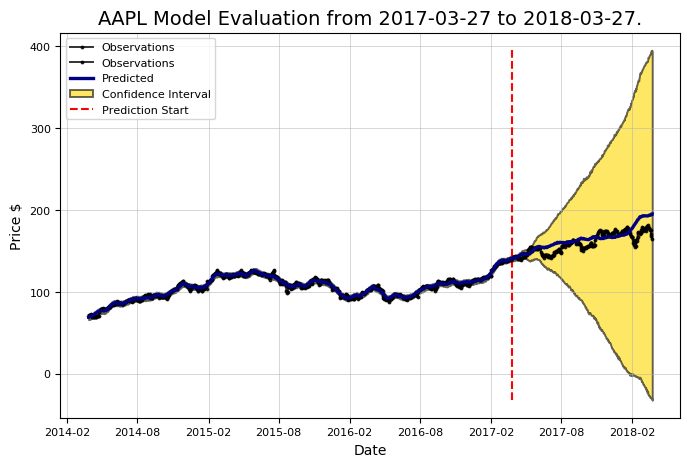

In [26]:
apple.evaluate_prediction()

### Add in weekly seasonality and evaluate

In [27]:
apple.weekly_seasonality=True


Prediction Range: 2017-03-27 to 2018-03-27.

Predicted price on 2018-03-24 = $195.62.
Actual price on    2018-03-23 = $164.94.

Average Absolute Error on Training Data = $1.77.
Average Absolute Error on Testing  Data = $7.48.

When the model predicted an increase, the price increased 45.28% of the time.
When the model predicted a  decrease, the price decreased  39.33% of the time.

The actual value was within the 80% confidence interval 97.59% of the time.


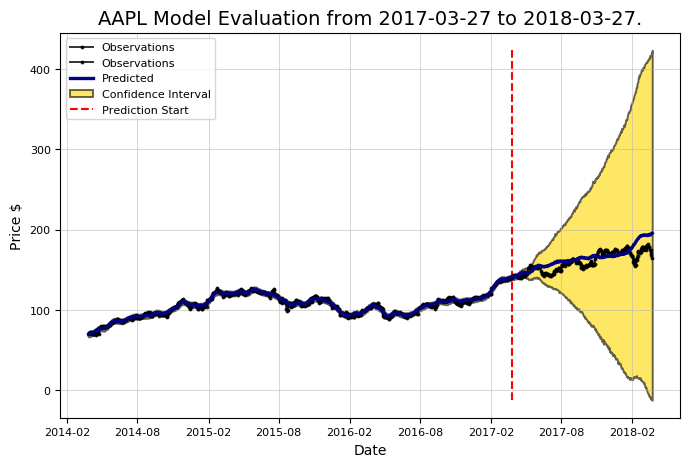

In [28]:
apple.evaluate_prediction()

In [43]:
apple.changepoint_prior_scale = 0.25


Prediction Range: 2017-03-27 to 2018-03-27.

Predicted price on 2018-03-24 = $196.08.
Actual price on    2018-03-23 = $164.94.

Average Absolute Error on Training Data = $1.72.
Average Absolute Error on Testing  Data = $7.53.

When the model predicted an increase, the price increased 46.06% of the time.
When the model predicted a  decrease, the price decreased  39.76% of the time.

The actual value was within the 80% confidence interval 98.39% of the time.


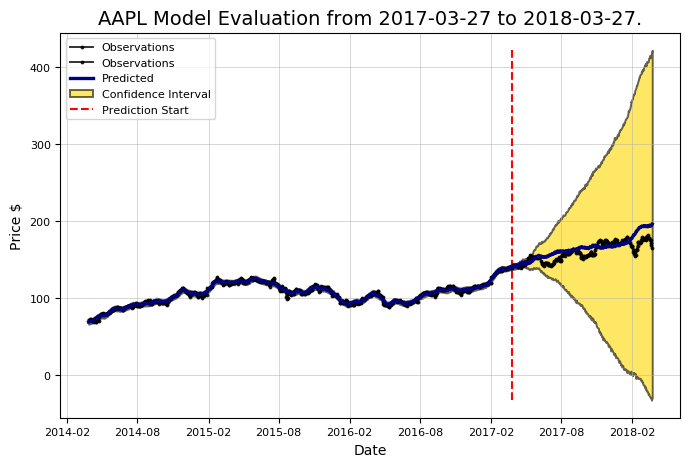

In [44]:
apple.evaluate_prediction()

In [45]:
apple.changepoint_prior_scale=0.25
apple.weekly_seasonality=True

## Play the Daily Market


For fun (this should never be done for real) we can "play" the market with our predictions. We will compare our model with the simple strategy of buying and holding over the same time period. The rules of our game are straightforward:



- If we predict the price will increase, we buy stock on that day. If we predict a decrease, we do not play the market.
- If we predicted an increase and the stock does increase, we recieve the change in price of the stock over that day times the number of shares.
- If we predicted an increase and the stock decreases, we lose the change in price of the stock over that day times the number of shares.

You played the stock market in AAPL from 2017-03-27 to 2018-03-27 with 1000 shares.

When the model predicted an increase, the price increased 46.06% of the time.
When the model predicted a  decrease, the price decreased  39.76% of the time.

The total profit using the Prophet model = $-9962.30.
The Buy and Hold strategy profit =         $25201.15.

Thanks for playing the stock market!



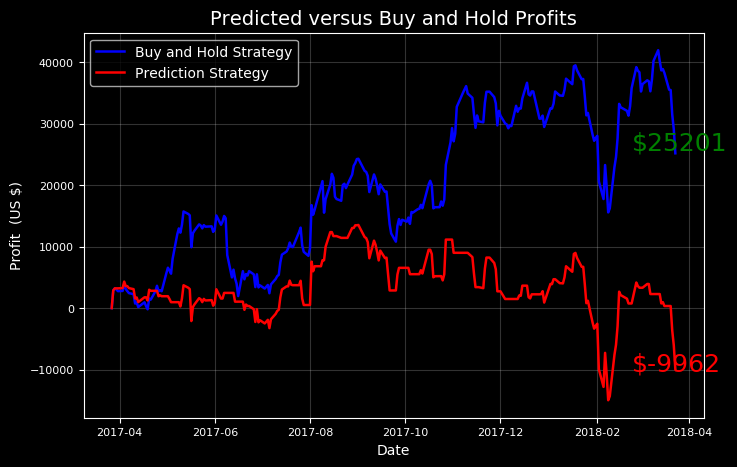

In [63]:
apple.evaluate_prediction(nshares=1000)

You played the stock market in AAPL from 2017-05-01 to 2018-01-05 with 1000 shares.

When the model predicted an increase, the price increased 48.89% of the time.
When the model predicted a  decrease, the price decreased  40.74% of the time.

The total profit using the Prophet model = $6166.61.
The Buy and Hold strategy profit =         $29587.48.

Thanks for playing the stock market!



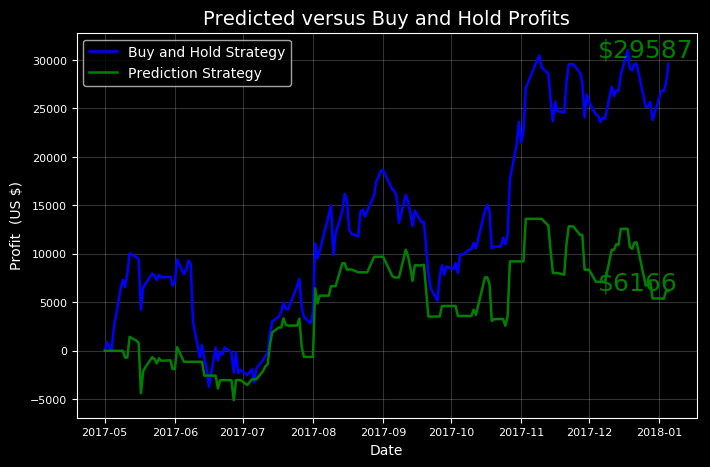

In [52]:
apple.evaluate_prediction(start_date = '2017-05-01', end_date = '2018-01-05', nshares=1000)

## Predict the Future


As a last step, we can predict any number of days into the future. This function automatically trains on the past 3 years and makes predictions with the uncertainty intervals.


Predicted Increase: 

         Date    estimate    change       upper       lower
2  2018-03-29  174.262283  0.103909  177.830451  170.596832
3  2018-03-30  174.938368  0.676085  178.574184  171.672124
5  2018-04-01  176.895285  1.956918  180.758397  173.225115
8  2018-04-04  175.064066  0.026849  178.790216  171.373206
9  2018-04-05  175.092286  0.028220  178.634973  171.180704
10 2018-04-06  175.369265  0.276979  178.949414  171.446574

Predicted Decrease: 

        Date    estimate    change       upper       lower
1 2018-03-28  174.158373 -0.194675  177.869562  170.622826
6 2018-04-02  175.360679 -1.534606  179.011526  171.691491
7 2018-04-03  175.037217 -0.323462  178.528609  171.214623


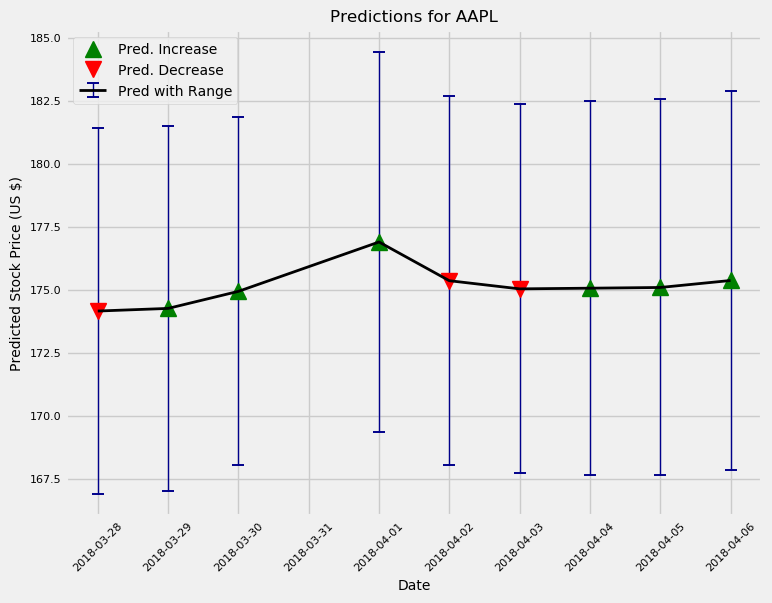

In [59]:
apple.predict_future(days=10)

The uncertainty increases the farther out in the future we predict. This is to be expected because the initial forecasted values have some uncertainty, and the next values are made based on the previous ones, so the range of possible values grows over time.



Whenever we make a prediction, we must be sure to include uncertainty intervals because there are no processes that can be exactly estimated in the future. While most people interpret a confidence interval as a lack of confidence, it really displays that we know the limitations of our model.


Predicted Increase: 

         Date    estimate    change       upper       lower
2  2018-03-29  174.262283  0.103909  177.770791  170.574784
3  2018-03-30  174.938368  0.676085  178.458883  171.338792
5  2018-04-01  176.895285  1.956918  180.794748  173.477833
8  2018-04-04  175.064066  0.026849  178.735219  171.106479
9  2018-04-05  175.092286  0.028220  178.751579  171.532693
10 2018-04-06  175.369265  0.276979  179.185183  171.921156
12 2018-04-08  176.732025  1.362760  180.541190  172.902572
14 2018-04-10  175.481433  0.041201  179.338676  171.571566
15 2018-04-11  175.593515  0.112082  179.366433  171.818591
19 2018-04-15  175.914378  0.980504  179.763208  171.752251
21 2018-04-17  175.240203  0.287234  179.149558  170.950586
26 2018-04-22  174.254659  0.639493  178.695842  169.094503
33 2018-04-29  172.511534  1.509388  177.400515  166.837179
35 2018-05-01  171.765081  0.069774  177.571777  165.750405
40 2018-05-06  172.622515  1.951707  179.109618  165.669350
42 2018-05-08  17

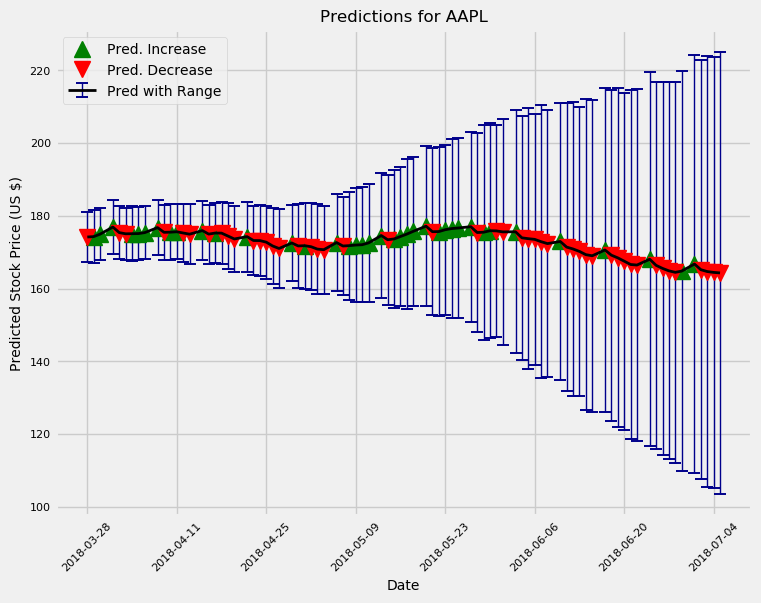

In [62]:
apple.predict_future(days=100)

> - End